# TIOBE Index Ratings Analysis (January 2023)

## **Source:** www.tiobe.com

### **Created by** Doğan Yiğit Yenigün (toUpperCase78)

_The TIOBE Programming Community index is an indicator of the popularity of programming languages. The index is updated once a month. The ratings are based on the number of skilled engineers world-wide, courses and third-party vendors. Popular seach engines such as Google, Bing, Yahoo!, Wikipedia, Amazon, YouTube and Baidu are used to calculate the ratings. It is important to note that the TIOBE index is not about the best programming language or the language in which most line of codes have been written._

_The index can be used to check whether your programming skills are still up to date or make a strategic decision about what programming language should be adopted when starting a new software system._

The text above is the explanation from the website for how the index ratings should be evaluated for the current states of programming languages.

Thanks to carefully crafted dataset that holds all the ratings starting from _June 2001,_ up to the present; my intention is to clearly see the popularity of the languages today and to analyze what lies ahead in the future.

### **OK, let's start by importing modules and setting up the data frame:**

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
tiobe = pd.read_csv('tiobe_index_all_ratings_january2023.csv')

In [304]:
tiobe['DATE'] = tiobe['DATE'].apply(lambda x: datetime.strptime(x, "%b %d, %Y"))
tiobe.set_index('DATE', inplace=True)

Which **programming languages** are available in the corresponding dataset? And, how many ratings have been measured in different days?

In [305]:
print(tiobe.columns)
print("\nRatings from {} languages are available in the dataset.\n".format(len(tiobe.columns)))
print("Individual ratings from up to {} different dates are presented.".format(tiobe.shape[0]))

Index(['C', 'Java', 'Python', 'C++', 'C#', 'Visual Basic', 'JavaScript', 'PHP',
       'R', 'SQL', 'Go', 'Swift', 'Perl', 'Assembly Language', 'Ruby',
       'MATLAB', 'Groovy', 'Rust', 'Objective-C', 'Dart',
       'Classic Visual Basic', 'PL/SQL', 'Delphi/Object Pascal',
       'Transact-SQL', 'Fortran', 'Prolog', 'Lua', 'Scratch'],
      dtype='object')

Ratings from 28 languages are available in the dataset.

Individual ratings from up to 256 different dates are presented.


What are the **first** and **last** days of the evaluations of index ratings

How many **days** have passed between those two dates?

In [306]:
print("FIRST DATE: {}".format(tiobe.index[0]))
print("LAST DATE:  {}".format(tiobe.index[-1]))
diff = tiobe.index[-1] - tiobe.index[0]
print("Total of {} days ({:.2f} years) have passed.".format(diff.days, diff.days/365))

FIRST DATE: 2001-06-30 00:00:00
LAST DATE:  2022-12-29 00:00:00
Total of 7852 days (21.51 years) have passed.


### Visualizations of Ratings from All Programming Languages

The first job is to _visualize the ratings_ of these available programming languages. These should give us clear ideas for how the ratings of each have been progressed throughout the years and compare which ones had more popularities in different times.

First, let's make sure which languages have been measured since the beginning of TIOBE Index, i.e. **no missing values** have been presented in the corresponding columns:

In [307]:
check_missing = tiobe.isnull().any()
langs_all_ratings_exist = list(check_missing[check_missing == False].index)
print(langs_all_ratings_exist)
print("\nTotal of {} languages possess all rating values in the dataset.".format(len(langs_all_ratings_exist)))

['C', 'Java', 'Python', 'C++', 'C#', 'JavaScript', 'PHP', 'Perl', 'Delphi/Object Pascal', 'Fortran', 'Prolog']

Total of 11 languages possess all rating values in the dataset.


Let's start the visualization by selecting the **first five programming languages** in the list above, in a figure along with their ratings and compare each other:

**Note:** Whenever you check the below and the latter figures against the one in the original web site, these **should** be roughly the same.

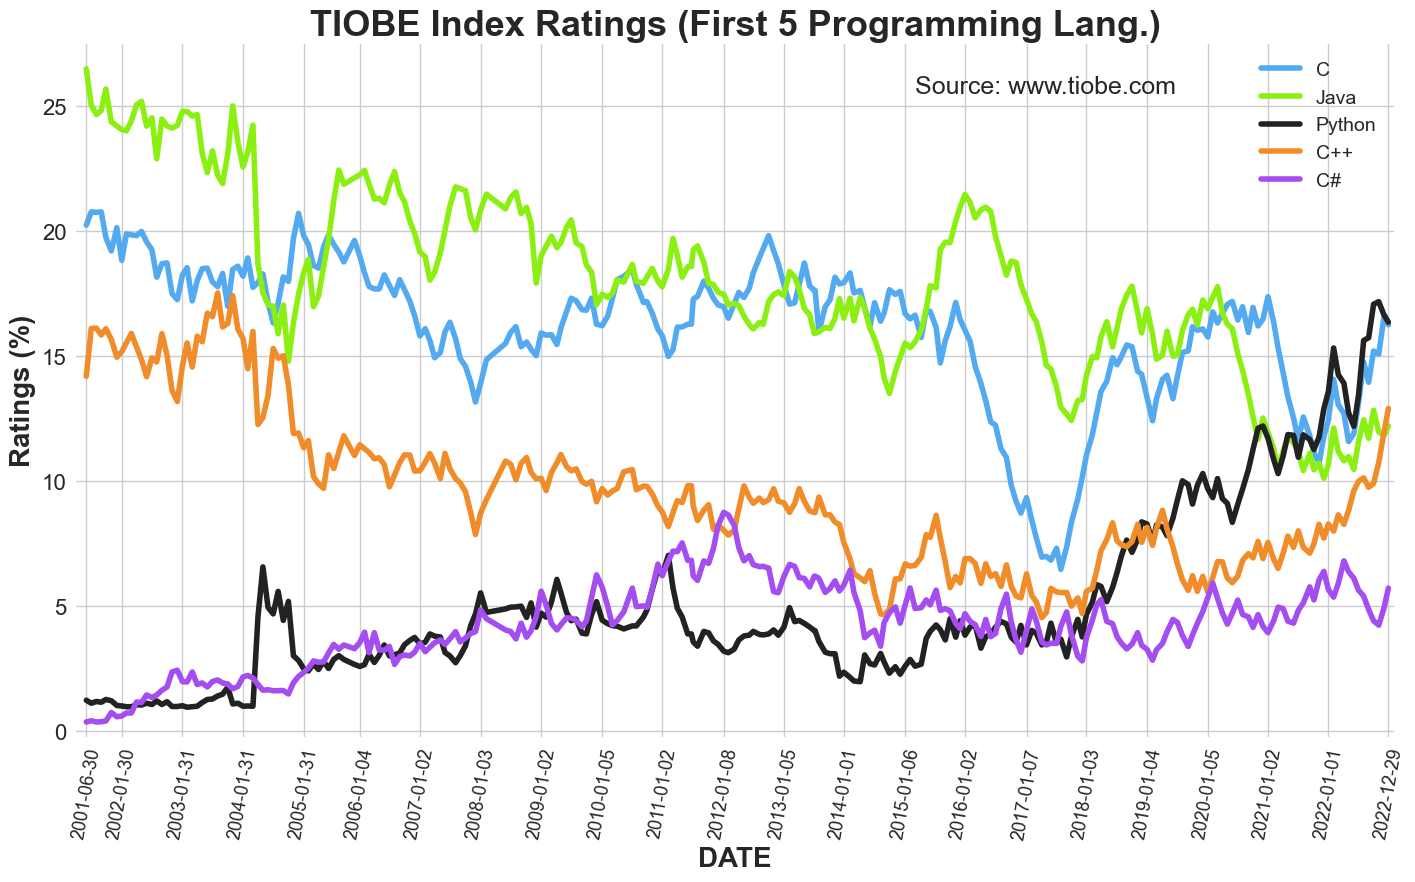

In [308]:
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = '#ffffff'
def get_years_ind(index):
    ls = []
    for v in index:
        if v.month == 1:  ls.append(v)
    return ls
tiobe_years_ind = get_years_ind(tiobe.index)
tiobe_years_ind.insert(0, tiobe.index[0])
tiobe_years_ind.append(tiobe.index[-1])
plt.figure(figsize=(17,9))
plt.axis([pd.Timestamp('2001-05-01'), pd.Timestamp('2023-01-31'), -0.2, 27.5])
plt.plot(tiobe.index, tiobe['C'], label='C', color='#54aaf0', linewidth=4)
plt.plot(tiobe.index, tiobe['Java'], label='Java', color='#8bf011', linewidth=4)
plt.plot(tiobe.index, tiobe['Python'], label='Python', color='#222222', linewidth=4)
plt.plot(tiobe.index, tiobe['C++'], label='C++', color='#f08c29', linewidth=4)
plt.plot(tiobe.index, tiobe['C#'], label='C#', color='#a44df0', linewidth=4)
plt.text(pd.Timestamp('2015-03-06'), 25.5, 'Source: www.tiobe.com', fontsize=18)
plt.title('TIOBE Index Ratings (First 5 Programming Lang.)', fontsize=26, fontweight='bold')
plt.xlabel('DATE', fontsize=20, fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, fontweight='bold')
plt.xticks(tiobe_years_ind, rotation=80, fontsize=13)
plt.yticks(fontsize=16)
plt.grid(color='#cccccc')
plt.legend(fontsize=14)
plt.show()

This figure frankly shows that **Java** has become _the most popular_ one **most of the times**! In 2000s, it usually had the rating **higher than 20%**; but in the big picture, its rating trend is getting lower generally and in the last few years, the rating is stayed between **10%** and **15%**.

**C** language seems to be the _2nd best_ overall. In an approximate 12-month period somewhere between **2004** and **2005**, it surpassed **Java**. This also continued mostly in 2012, 2013 and 2014. Additionally, it became the most popular again in the years around **2020** and **2021** and even this quite-old programming language did not seem to lost popularity today!

**C++** followed the similar trend like **Java**. Although it started at around **15%** in the early 2000s, its popularity was decreased gradually in recent years, down to **5%** sometime in the year **2014** and **2017**; however, this language is getting the popularity again in the last year and is close to **13%** while entering year **2023**!.

**Python** should not go unnoticed, as the language's rating was significantly risen up **in the last 5 years**, exceeding **10%**, plus it reached to **the top** in 2022 and still continue to challenge against C and Java!

**C#** did not change much at all since 2010 (and if we ignore the fluctuations). It reached as high as about **9%** around 2012, but continues within the range of **4-6%** recently.

**After these discussions, why not creating the summary statistics of these languages?**

In [309]:
first_five = ['C', 'C++', 'C#', 'Java', 'Python']
round(tiobe[first_five].describe(), 2)

,C,C++,C#,Java,Python
count,256.00,256.00,256.00,256.00,256.00
mean,16.04,9.48,4.23,18.00,5.06
std,2.87,3.10,1.69,3.72,3.57
min,6.48,4.55,0.38,10.12,0.97
25%,14.96,7.07,3.29,15.97,3.01
50%,16.63,9.13,4.32,17.77,4.00
75%,17.86,10.76,5.35,20.73,5.70
max,20.77,17.53,8.76,26.49,17.18


Yep, this covers lots of information without a doubt! But, in simpler way, it is convenient to take **the lowest** and **the highest** ratings and **the specific dates** for when these were occurred with well-constructred text format.

For same ratings that might have been measured in different dates, _the first occurrence_ is considered, though...

In [310]:
for lang in first_five:
    lang_min = tiobe[tiobe[lang] == min(tiobe[lang])][lang]
    lang_max = tiobe[tiobe[lang] == max(tiobe[lang])][lang]
    print("{:>6} --> Lowest rating {:5}% on {}    Highest rating {:5}% on {}" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

     C --> Lowest rating  6.48% on 2017-08-02    Highest rating 20.77% on 2001-07-30
   C++ --> Lowest rating  4.55% on 2017-04-09    Highest rating 17.53% on 2003-08-31
    C# --> Lowest rating  0.38% on 2001-06-30    Highest rating  8.76% on 2012-01-08
  Java --> Lowest rating 10.12% on 2021-12-05    Highest rating 26.49% on 2001-06-30
Python --> Lowest rating  0.97% on 2003-02-28    Highest rating 17.18% on 2022-11-01


Next, I'd like to continue with the web programming languages, **JavaScript** and **PHP**. Again, the highest and the lowest ratings with dates were included below the figure.

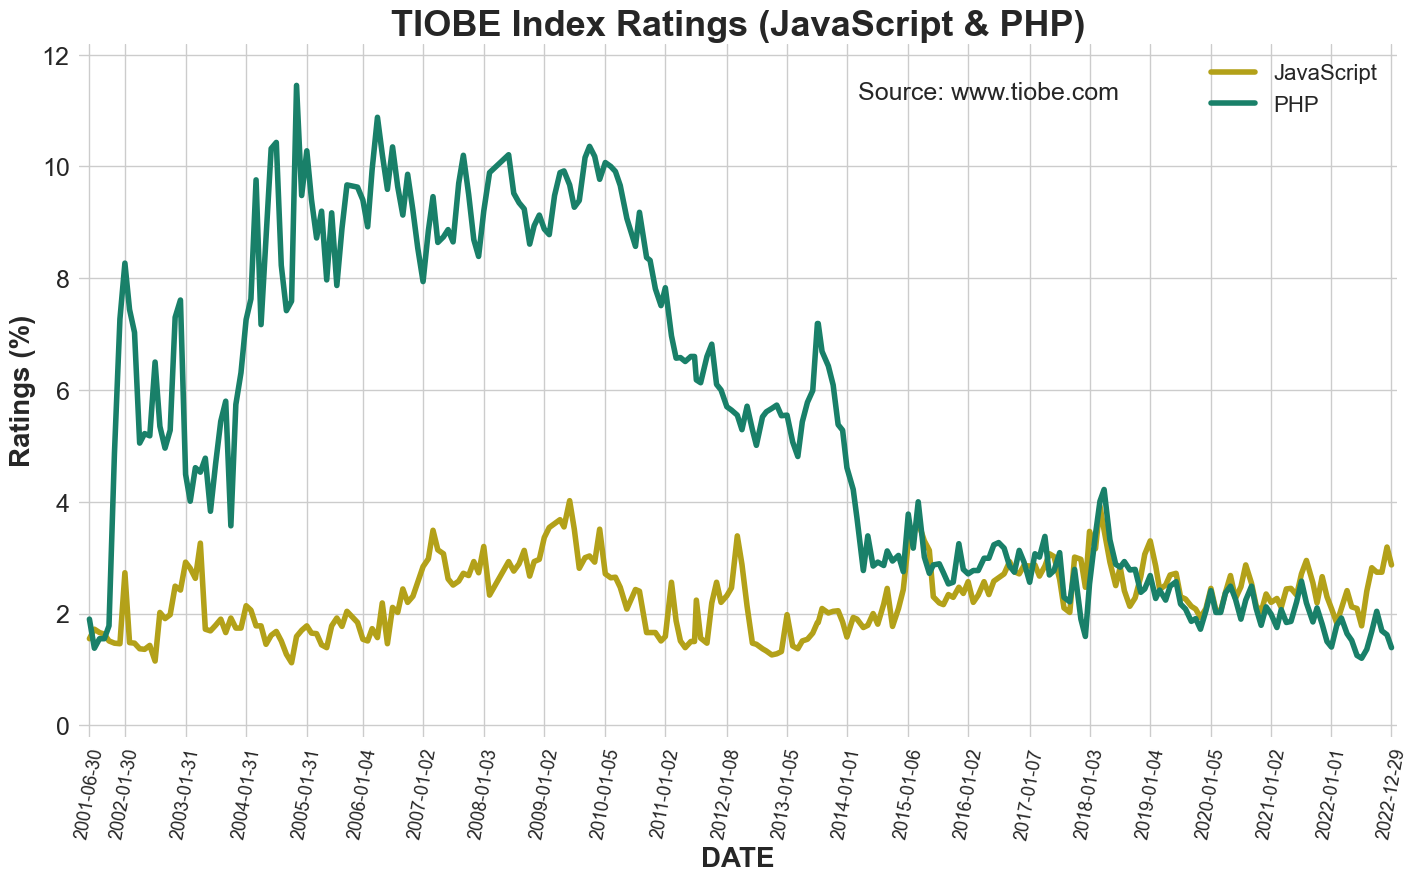

JavaScript --> Lowest rating  1.12% on 2004-10-31   Highest rating  4.02% on 2009-06-04
       PHP --> Lowest rating   1.2% on 2022-07-02   Highest rating 11.45% on 2004-11-30


In [311]:
plt.figure(figsize=(17,9))
plt.axis([pd.Timestamp('2001-05-01'), pd.Timestamp('2023-01-31'), -0.2, 12.2])
plt.plot(tiobe.index, tiobe['JavaScript'], label='JavaScript', color='#b3a119', linewidth=4)
plt.plot(tiobe.index, tiobe['PHP'], label='PHP', color='#198069', linewidth=4)
plt.text(pd.Timestamp('2014-03-06'), 11.2, 'Source: www.tiobe.com', fontsize=18)
plt.title('TIOBE Index Ratings (JavaScript & PHP)', fontsize=26, fontweight='bold')
plt.xlabel('DATE', fontsize=20, fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, fontweight='bold')
plt.xticks(tiobe_years_ind, rotation=80, fontsize=13)
plt.yticks(fontsize=18)
plt.grid(color='#cccccc')
plt.legend(fontsize=16)
plt.show()
for lang in ['JavaScript', 'PHP']:
    lang_min = tiobe[tiobe[lang] == min(tiobe[lang])][lang]
    lang_max = tiobe[tiobe[lang] == max(tiobe[lang])][lang]
    print("{:>10} --> Lowest rating {:5}% on {}   Highest rating {:5}% on {}" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

This clearly shows **PHP** by far was one of the most popular programming language, especially in 2000s! It sometimes received ratings of **above 10%**. However, it maintained within **2-4%** between **2014** and **2021**. Later than that, it further got down under **2%** and it is expected to maintain this ratings as there are other programming languages and/or frameworks today, suitable for backend programming.

For **JavaScript**, there were not significant changes in all measurements. It went as high as **4%**, but it roughly remained stationary between **2-3.8%** in recent years, but this language is still being used for frontend programming also supported with frameworks such as **React**.

The next figure involves two other programming languages, **Perl** and **Delphi/Object Pascal**, that are the remaining ones having **no missing values** in the dataset:

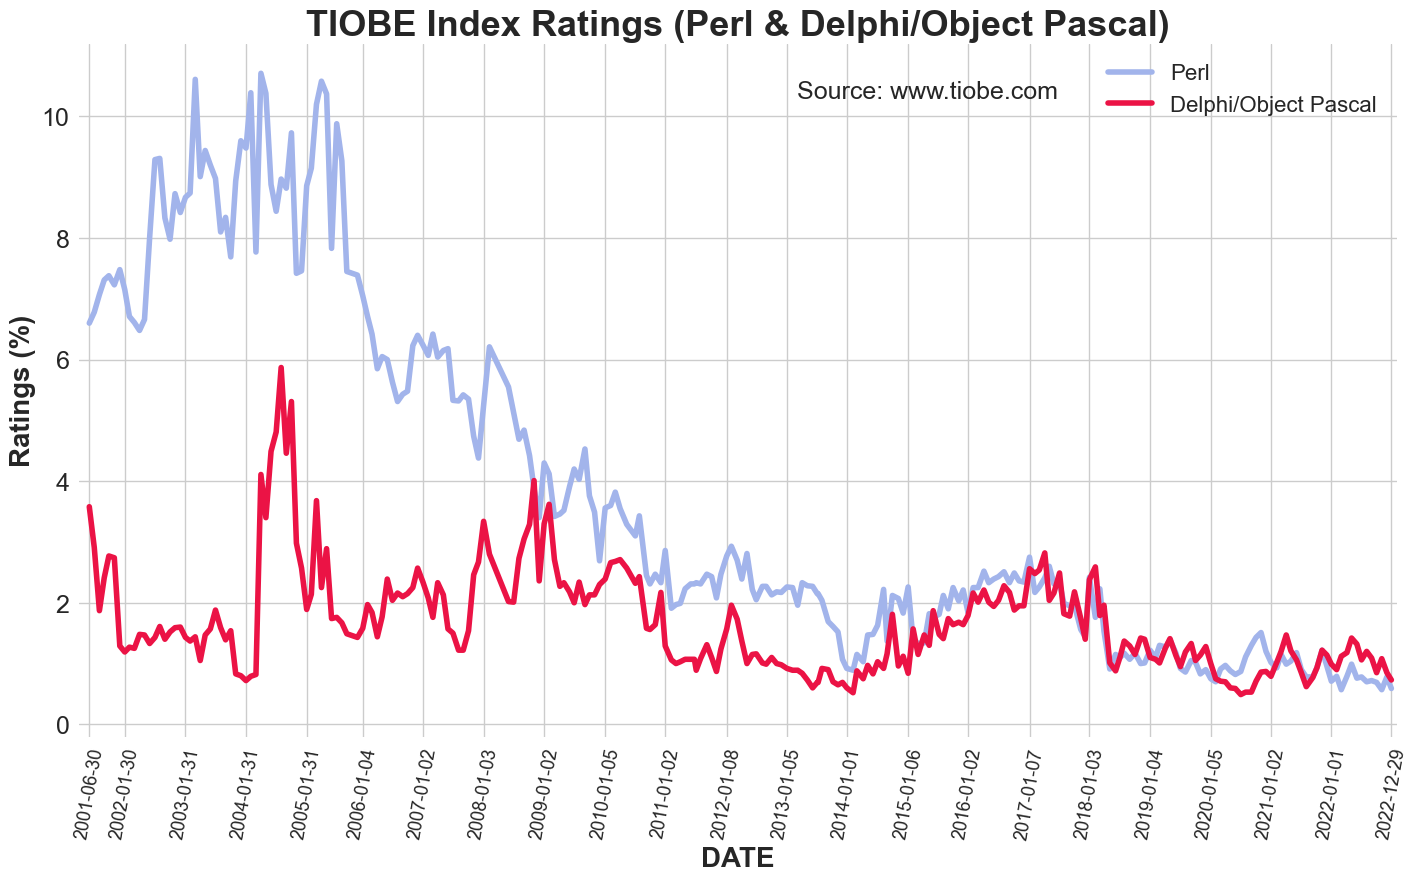

                Perl --> Lowest rating  0.57% on 2022-03-02   Highest rating 10.71% on 2004-04-30
Delphi/Object Pascal --> Lowest rating  0.49% on 2020-07-04   Highest rating  5.87% on 2004-08-30


In [312]:
plt.figure(figsize=(17,9))
plt.axis([pd.Timestamp('2001-05-01'), pd.Timestamp('2023-01-31'), -0.2, 11.2])
plt.plot(tiobe.index, tiobe['Perl'], label='Perl', color='#a2b4eb', linewidth=4)
plt.plot(tiobe.index, tiobe['Delphi/Object Pascal'], label='Delphi/Object Pascal', color='#eb1345', linewidth=4)
plt.text(pd.Timestamp('2013-03-06'), 10.3, 'Source: www.tiobe.com', fontsize=18)
plt.title('TIOBE Index Ratings (Perl & Delphi/Object Pascal)', fontsize=26, fontweight='bold')
plt.xlabel('DATE', fontsize=20, fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, fontweight='bold')
plt.xticks(tiobe_years_ind, rotation=80, fontsize=13)
plt.yticks(fontsize=18)
plt.grid(color='#cccccc')
plt.legend(fontsize=16)
plt.show()
for lang in ['Perl', 'Delphi/Object Pascal']:
    lang_min = tiobe[tiobe[lang] == min(tiobe[lang])][lang]
    lang_max = tiobe[tiobe[lang] == max(tiobe[lang])][lang]
    print("{:>20} --> Lowest rating {:5}% on {}   Highest rating {:5}% on {}" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

Similarly, **Perl** has achieved to become one of the most preferred programming language, sometimes getting its rating **above 10%** until the end of 2005. Then, it substantially lost the popularity afterwards, and it continues to have the ratings **below 2%** (or even **below 1%**) in recent years!

About **Delphi/Object Pascal**, it arose up to **6%** in 2004; the second peak occurred with **4%** in near the end of 2008. For the last few years, it had the ratings very similar to **Perl** and as seen above, it seemed to be in favor against the language 

The next figure involves more programming languages, but with **leading missing values** in the dataset. That means there exist NULL rating values for these languages, thus they were not measured in the first few years by TIOBE Index. Despite this situation, it does not affect the figure creation at all...

**Let's see what we come across below:**

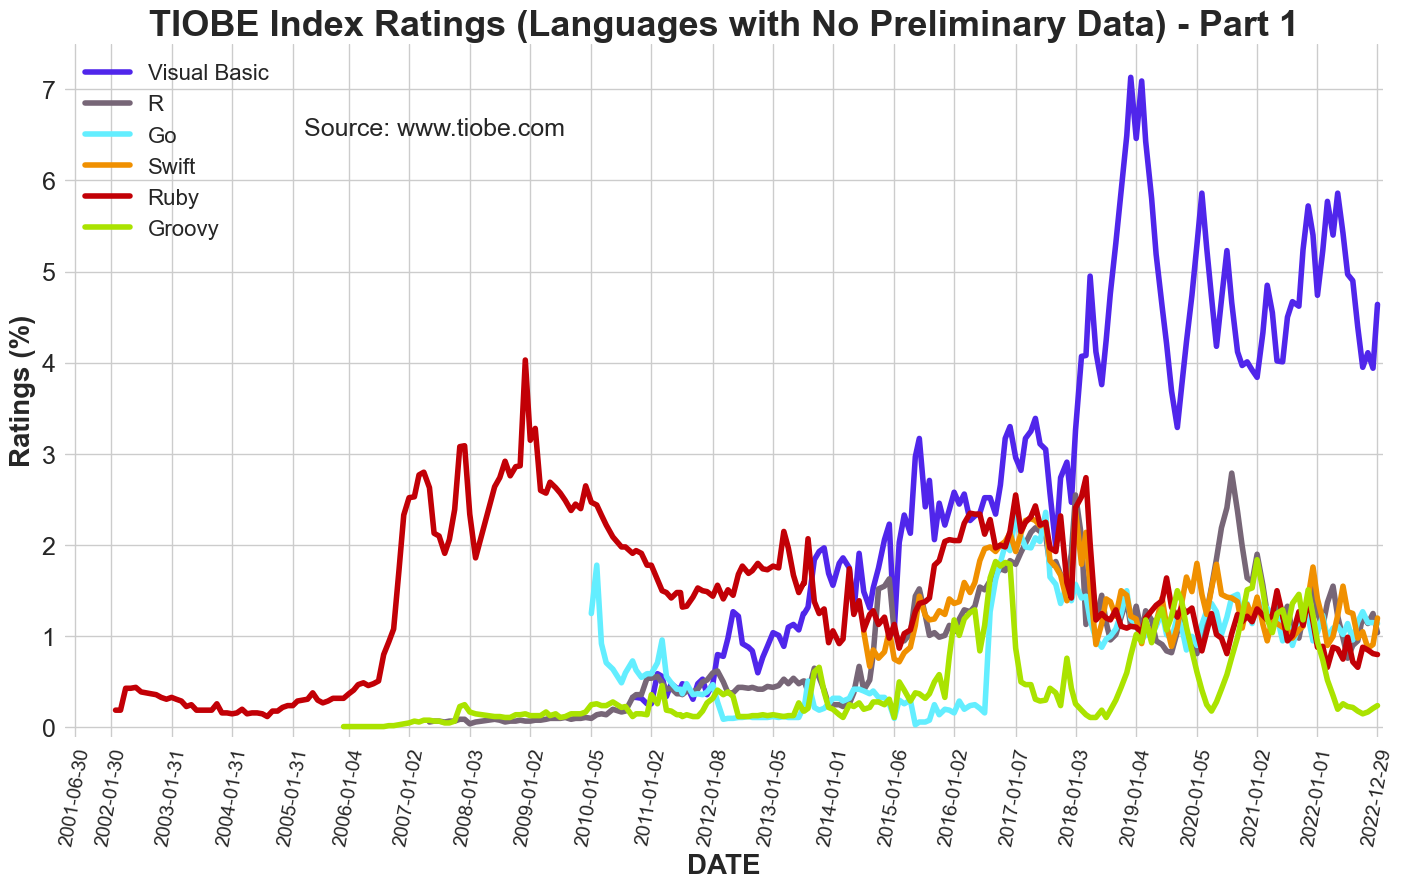

Visual Basic --> Lowest rating  0.26% on 2010-12-07   Highest rating  7.13% on 2018-12-02
           R --> Lowest rating  0.04% on 2008-01-03   Highest rating  2.79% on 2020-08-02
          Go --> Lowest rating  0.03% on 2015-05-13   Highest rating  2.36% on 2017-07-07
       Swift --> Lowest rating  0.67% on 2014-08-11   Highest rating  2.38% on 2018-01-03
        Ruby --> Lowest rating  0.12% on 2004-08-30   Highest rating  4.03% on 2008-12-03
      Groovy --> Lowest rating  0.01% on 2005-12-03   Highest rating  1.84% on 2021-01-02


In [313]:
plt.figure(figsize=(17,9))
plt.axis([pd.Timestamp('2001-05-01'), pd.Timestamp('2023-01-31'), -0.1, 7.5])
plt.plot(tiobe.index, tiobe['Visual Basic'], label='Visual Basic', color='#5026eb', linewidth=4)
plt.plot(tiobe.index, tiobe['R'], label='R', color='#776677', linewidth=4)
plt.plot(tiobe.index, tiobe['Go'], label='Go', color='#63eeff', linewidth=4)
plt.plot(tiobe.index, tiobe['Swift'], label='Swift', color='#f09000', linewidth=4)
plt.plot(tiobe.index, tiobe['Ruby'], label='Ruby', color='#c20006', linewidth=4)
plt.plot(tiobe.index, tiobe['Groovy'], label='Groovy', color='#aae300', linewidth=4)
plt.text(pd.Timestamp('2005-04-06'), 6.5, 'Source: www.tiobe.com', fontsize=18)
plt.title('TIOBE Index Ratings (Languages with No Preliminary Data) - Part 1', fontsize=26, fontweight='bold')
plt.xlabel('DATE', fontsize=20, fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, fontweight='bold')
plt.xticks(tiobe_years_ind, rotation=80, fontsize=14)
plt.yticks(fontsize=18)
plt.grid(color='#cccccc')
plt.legend(fontsize=16)
plt.show()
for lang in ['Visual Basic', 'R', 'Go', 'Swift', 'Ruby', 'Groovy']:
    lang_rt = tiobe[~tiobe[lang].isnull()][lang]
    lang_min = lang_rt[lang_rt == min(lang_rt)]
    lang_max = lang_rt[lang_rt == max(lang_rt)]
    print("{:>12} --> Lowest rating {:5}% on {}   Highest rating {:5}% on {}" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

**Among these six languages above:**

- **Visual Basic** (started in 2010) gained popularity remarkably every year until 2018, reaching a little higher than **7%**. Then, there are rises and falls in the last four years, but achieved staying at above **4%**.
- **Ruby** had the most ratings data, started in the beginning of 2002. It saw its peak in late 2008 with a little more than **4%**, then its rating changed continuously between **0.9%** and **2.8%** afterwards. In the year 2022, the rating fluctuated **below 1%**.
- When **R** appeared in 2007, it wasn't so popular among the software developers. But, it slowly gained its popularity, thus staying above **1%** most of the time in the last 6 years. Also, it saw its own peak in year 2020, with about **2.8%**. 
- **Go** (started in 2010) made a good entrance to the world of prog. languages, with above **1%** rating; but then had its rating decreased gradually. In 2017, it saw its sharp increase and reached the peak with **2.3%**. Until today, this language's rating values wander between **1%** and **1.5%**.
- Apple's programming language **Swift** first appeared in 2014 (which aimed to replace Objective-C) and has seen the highest rating of **2.4%** in 2018. For the last years, it stays within **0.9%** to **1.8%**.
- **Groovy** (started in 2006) did not gain popularity in the first few years. But, things have changed for the language when it received the highest rating with **1.8%** in 2016. Interestingly, it went down to around **%0.2** in 2020, then risen up at a very high rate, to approx. **1.9%**. However, its popularity got sharply decreased again in 2022, down to **0.3%**.

Now, let's move to the _2nd part_ of programming languages with no preliminary data existed in the index:

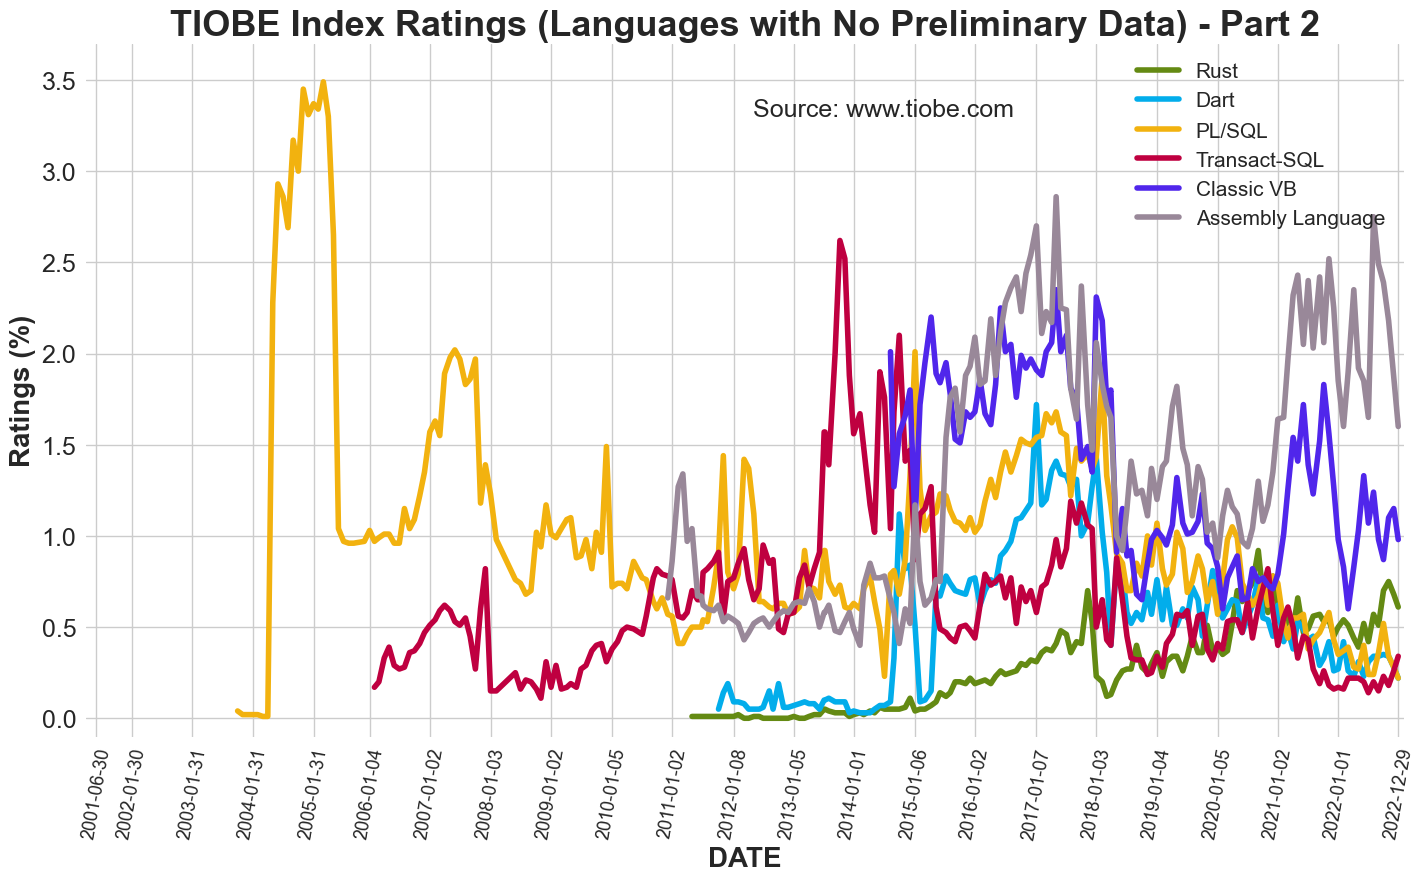

                Rust --> Lowest rating   0.0% on 2012-03-11   Highest rating  0.92% on 2020-09-06
                Dart --> Lowest rating  0.03% on 2013-12-06   Highest rating  1.72% on 2017-01-07
              PL/SQL --> Lowest rating  0.01% on 2004-03-31   Highest rating  3.49% on 2005-03-31
        Transact-SQL --> Lowest rating  0.11% on 2008-11-02   Highest rating  2.62% on 2013-10-10
Classic Visual Basic --> Lowest rating   0.6% on 2020-02-04   Highest rating  2.35% on 2017-05-06
   Assembly Language --> Lowest rating   0.4% on 2014-02-08   Highest rating  2.86% on 2017-05-06


In [314]:
plt.figure(figsize=(17,9))
plt.axis([pd.Timestamp('2001-05-01'), pd.Timestamp('2023-01-31'), -0.1, 3.7])
plt.plot(tiobe.index, tiobe['Rust'], label='Rust', color='#648a13', linewidth=4)
plt.plot(tiobe.index, tiobe['Dart'], label='Dart', color='#02adeb', linewidth=4)
plt.plot(tiobe.index, tiobe['PL/SQL'], label='PL/SQL', color='#f2b20f', linewidth=4)
plt.plot(tiobe.index, tiobe['Transact-SQL'], label='Transact-SQL', color='#bf0040', linewidth=4)
plt.plot(tiobe.index, tiobe['Classic Visual Basic'], label='Classic VB', color='#5026eb', linewidth=4)
plt.plot(tiobe.index, tiobe['Assembly Language'], label='Assembly Language', color='#998899', linewidth=4)
plt.text(pd.Timestamp('2012-05-06'), 3.3, 'Source: www.tiobe.com', fontsize=18)
plt.title('TIOBE Index Ratings (Languages with No Preliminary Data) - Part 2', fontsize=26, fontweight='bold')
plt.xlabel('DATE', fontsize=20, fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, fontweight='bold')
plt.xticks(tiobe_years_ind, rotation=80, fontsize=13)
plt.yticks(fontsize=18)
plt.grid(color='#cccccc')
plt.legend(fontsize=15, loc='upper right')
plt.show()
for lang in ['Rust', 'Dart', 'PL/SQL', 'Transact-SQL', 'Classic Visual Basic', 'Assembly Language']:
    lang_rt = tiobe[~tiobe[lang].isnull()][lang]
    lang_min = lang_rt[lang_rt == min(lang_rt)]
    lang_max = lang_rt[lang_rt == max(lang_rt)]
    print("{:>20} --> Lowest rating {:5}% on {}   Highest rating {:5}% on {}" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

Here is the figure above, implying that:

- **PL/SQL**, first appeared in late 2003, had substantial popularity within the first two years, with the maximum of nearly **3.5%**. Later, its rating was decreased in the next years, generally staying between **0.5%** and **1.5%**, later almost down under **0.5%** in 2022.
- **Transact-SQL** (started in 2006) has seen its highest value with **%2.6%** in 2013. The ratings in the last two years constantly change, often staying **below 1%** in the last several years, and lastly, going **below 0.5%**.
- **Classic Visual Basic** (started in 2014) has progressed very well by usually staying above **1.5%** till the 1st quarter of 2018. But in 2020, we see the language was somewhere around **0.75%**, then went higher than **1%**, then fluctuate around this percentage value.
- **Dart** (started in 2011) reached its peak popularity in late 2016 with **1.7%**. Like others, it has lost some ratings later, and did not manage to stay above **0.5%** in 2022.
- **Rust**, another language that made its debut in 2011, has risen up very slowly; but overall, it has _never achieved any ratings_ that passed above **1%**, even in the late 2022!
- Lastly, **Assembly Language** (measurement started at around late 2010) began with the ratings no lower than **0.4%** in its first years. The language showed itself much better by reaching approx. **2.9%** in 2017. Similar to others, it goes within the range of **1%** and **1.5%** in 2020, then had its ratings increased to progress between **1.5%** and **2.5%** in the last two years. Well, can it stay in this range in 2023? Because the last months indicate that there are significant decreases at all.

All right, here comes another figure that contains the programming languages that were added in the dataset, sometime _later year 2020_:

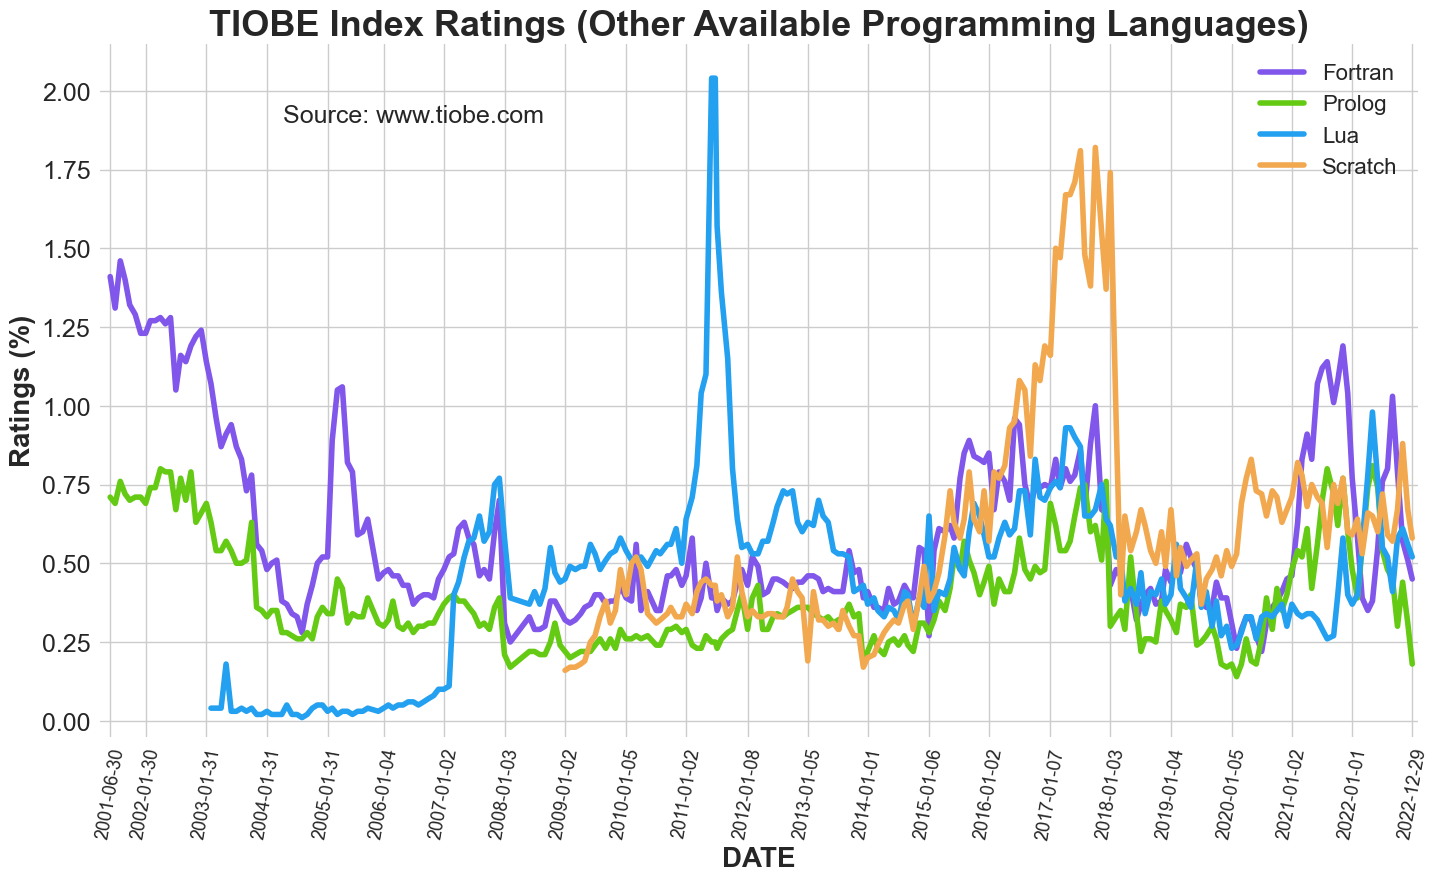

   Fortran --> Lowest rating  0.22% on 2020-07-04   Highest rating  1.46% on 2001-08-30
    Prolog --> Lowest rating  0.14% on 2020-02-04   Highest rating  0.81% on 2022-05-03
       Lua --> Lowest rating  0.01% on 2004-08-30   Highest rating  2.04% on 2011-06-05
   Scratch --> Lowest rating  0.16% on 2009-01-02   Highest rating  1.82% on 2017-10-05


In [315]:
plt.figure(figsize=(17,9))
plt.axis([pd.Timestamp('2001-05-01'), pd.Timestamp('2023-01-31'), -0.05, 2.15])
plt.plot(tiobe.index, tiobe['Fortran'], label='Fortran', color='#8056eb', linewidth=4)
plt.plot(tiobe.index, tiobe['Prolog'], label='Prolog', color='#64ca13', linewidth=4)
plt.plot(tiobe.index, tiobe['Lua'], label='Lua', color='#23a0f0', linewidth=4)
plt.plot(tiobe.index, tiobe['Scratch'], label='Scratch', color='#f2a84f', linewidth=4)
plt.text(pd.Timestamp('2004-05-06'), 1.9, 'Source: www.tiobe.com', fontsize=18)
plt.title('TIOBE Index Ratings (Other Available Programming Languages)', fontsize=26, fontweight='bold')
plt.xlabel('DATE', fontsize=20, fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, fontweight='bold')
plt.xticks(tiobe_years_ind, rotation=80, fontsize=13)
plt.yticks(fontsize=18)
plt.grid(color='#cccccc')
plt.legend(fontsize=16, loc='upper right')
plt.show()
for lang in ['Fortran', 'Prolog', 'Lua', 'Scratch']:
    lang_rt = tiobe[~tiobe[lang].isnull()][lang]
    lang_min = lang_rt[lang_rt == min(lang_rt)]
    lang_max = lang_rt[lang_rt == max(lang_rt)]
    print("{:>10} --> Lowest rating {:5}% on {}   Highest rating {:5}% on {}" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

Let's analyze the outcome of this figure above:

* **Fortran**, which is a well-known and one of the old programming languages in the history, has naturally appeared in all measurements of TIOBE Index ratings. It started with higher than **1%** rating in the early 2000s, but experienced a substantial drop to below **0.5%** until mid-2010s. Then, it seemed to gain some ratings later back up to **1%**, later fell down again, and in the last two years, the ratings had high level of fluctuations between **0.3%** and **1.2%**.
* Another language with the availability of all ratings is **Prolog**, started around **0.75%** in 2001. Later, its rating progressed around **0.3%** until year 2014, then slightly risen up to all-time highest value again in three years, then dropped back to the lowest values until late 2020. All in all, this language never witnessed its rating exceeding **1%**!
* The rest of two languages are those with no preliminary data: About **Lua** (which is a suitable one for some video games, to the best of my knowledge), it did not cause any awareness among software developers in its first four years; but afterwards, it finally got some share in the ratings by reaching **0.75%** in late 2007, then its all-time peak value getting higher than **2%** in 2011! Later, the figure indicates that the language is unable to reach the **1%** boundary again up until today, at least a local peak to approx. **1%** can be seen sometime in 2022.
* **Scratch** first appeared in 2009 and its first six years stayed between **0.2%** and **0.5**. However, a substantial increase of ratings happened continuously, up to **1.8%** in 2017, becoming its peak value, then went down to around **0.7%**.

One more figure to analyze, containing 3 more programming languages which have **intermediate missing values** in common! When inspected, **SQL** had a very big gap between **2004** and **2017**! In contrast, **MATLAB** and **Objective-C** only had a few ones in **2002**. To fill the missing ones properly, **linear interpolation** was applied to each of them...

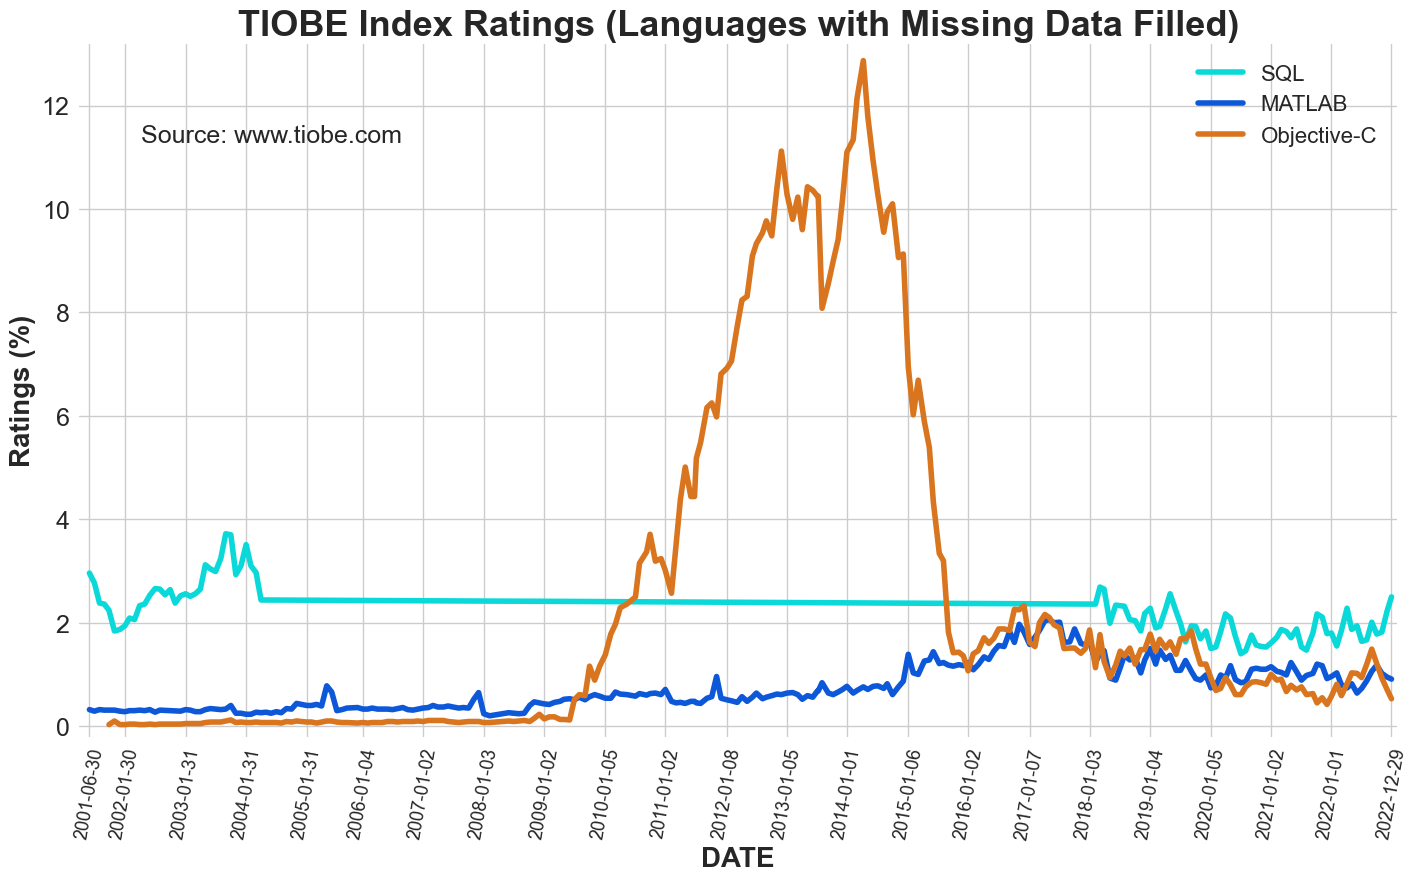

                 SQL --> Lowest rating   1.4% on 2020-07-04   Highest rating  3.72% on 2003-09-30
              MATLAB --> Lowest rating   0.2% on 2008-02-07   Highest rating  2.06% on 2017-05-06
         Objective-C --> Lowest rating  0.03% on 2001-10-26   Highest rating 12.87% on 2014-04-10


In [316]:
tiobe['SQL'] = tiobe['SQL'].interpolate()
tiobe['MATLAB'] = tiobe['MATLAB'].interpolate()
tiobe['Objective-C'] = tiobe['Objective-C'].interpolate()
plt.figure(figsize=(17,9))
plt.axis([pd.Timestamp('2001-05-01'), pd.Timestamp('2023-01-31'), -0.2, 13.2])
plt.plot(tiobe.index, tiobe['SQL'], label='SQL', color='#0bd9d9', linewidth=4)
plt.plot(tiobe.index, tiobe['MATLAB'], label='MATLAB', color='#0d58d9', linewidth=4)
plt.plot(tiobe.index, tiobe['Objective-C'], label='Objective-C', color='#d9751e', linewidth=4)
plt.text(pd.Timestamp('2002-05-06'), 11.3, 'Source: www.tiobe.com', fontsize=18)
plt.title('TIOBE Index Ratings (Languages with Missing Data Filled)', fontsize=26, fontweight='bold')
plt.xlabel('DATE', fontsize=20, fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, fontweight='bold')
plt.xticks(tiobe_years_ind, rotation=80, fontsize=13)
plt.yticks(fontsize=18)
plt.grid(color='#cccccc')
plt.legend(fontsize=16)
plt.show()
for lang in ['SQL', 'MATLAB', 'Objective-C']:
    lang_rt = tiobe[~tiobe[lang].isnull()][lang]
    lang_min = lang_rt[lang_rt == min(lang_rt)]
    lang_max = lang_rt[lang_rt == max(lang_rt)]
    print("{:>20} --> Lowest rating {:5}% on {}   Highest rating {:5}% on {}" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

**From this figure above, we learned that:**
    
**Objective-C** remained at the bottom until the first half of 2009! Then it built up its rating significantly every year until 2015. We've seen the rating going **above 12%**, which looks incredible for a programming language! One of the reasons should be because the 3rd party applications were written with this language for **iOS**, Apple's mobile operating system for _iPhone_ and _iPad_. And, lots of programmers got heavily interested in making mobile apps and games with ever-growing popularity of this OS with compatible hardware. However, things turned reversibly for the language after the peak in 2014, as it can be seen in the figure that it quickly lost the popularity in **just two years**, down to **less than 2%** and never caught up the previous days' ratings, even it can go below **1%** in the recent years. Here, one reason might be that **Swift**, which is another programming language created by Apple, is replacing the language slowly for mobile application development and if you carefully inspect the ratings in the figure of "Languages with No Preliminary Data - Part 1", Swift's rating should always be ahead of this language.

There is not much to say about **MATLAB**, as the language stayed below **1%** for a very long time. Although it became as high as **2%** in 2017, we see the values going up and down around **1%** again.

The database language **SQL** had the highest rating **nearly 4%** in 2003. To be honest, it is impossible to discuss if it went higher than that value or not in the very long time gap until the beginning of 2018. Perhaps, TIOBE did not take the language into account, but later re-included for measurements. The general trend in the last five years show a small decrease overall, usually going **under 2%** but has potential to rise the rating up in 2023.

## Counting the Ranks for Each Programming Language

So, the visualizations above clearly demonstrated _the states of all programming languages_ included in the analysis, both in the past and the present.

As a different and unique aspect, in the next one, I'd like to observe **how each language ranked against each other** by counting their placements within all evaluations made by TIOBE each month.

For this to work, we need to get the ranks of all languages for each specific date (i.e. for each row in the dataset). Plus, my assumptions are the ranking is in **dense** method; values are compared from highest to lowest as intended; and any NULL values are not included.

In [317]:
tiobe_ranks = tiobe.rank(method='dense', ascending=False, axis=1)

Then, it is easy to count the rank values for individual languages. Here, a function needs to be defined to get the work done, thus the count operation is carried out seamlessly. However, I limited this to take only **the top 10 rankings**.

In [318]:
def get_rank_count(x):
    ranks = []
    for i in range(1,11):
        ranks.append(list(x.values).count(i))
    return ranks
tiobe_ranks_count = tiobe_ranks.apply(get_rank_count)

After we obtained the counts for top 10 rankings for all available languages, it is time to prepare the actual table. 

Here, I wanted the ranks to be the columns, labeling them from **1st** to **10th**, while the languages are indexes themselves. Furthermore, it should be convenient to highlight the corresponding cells which mark **the highest count** for each specific rank to determine the dominance of languages in this way.

_Note: Those highlighted cells might not appear if viewed from GitHub._

In [319]:
ranking_labels = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #90bbff' if v else '' for v in is_max]
tiobe_ranks_count_df = tiobe_ranks_count.T
tiobe_ranks_count_list = dict(zip(tiobe_ranks_count.index, ranking_labels))
tiobe_ranks_count_df.rename(columns=tiobe_ranks_count_list, inplace=True)
tiobe_ranks_count_df.style.apply(highlight_max)

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
C,66,190,0,0,0,0,0,0,0,0
Java,174,62,18,2,0,0,0,0,0,0
Python,16,5,28,22,33,40,63,12,11,19
C++,0,0,162,94,0,0,0,0,0,0
C#,0,0,3,32,108,45,33,12,3,10
Visual Basic,0,0,0,0,14,54,10,8,4,10
JavaScript,0,0,0,0,0,17,79,57,39,30
PHP,0,0,12,60,50,48,24,33,17,8
R,0,0,0,0,0,0,0,4,6,4
SQL,0,0,0,0,2,26,17,68,71,55


### _Ah, we finally retrieved the table we expected!_ This explains a lot about the superiority of programing languages compared to others, but let's make explanations that substantially drew our attention:

- **Java** is _the most successful_ programming language according to TIOBE Index ratings! Within all rating measurements since the beginning, it took _the 1st place_ **174** times! That's an incredible number for a language in software development! We wonder whether or not it can increase the number for the years to come, because its ratings is getting behind other long-living programming languages.
- **C** is the _2nd best_ programming language, as it _placed 2nd_ **190** times and became the 1st language in **66** different dates of measurements! In addition, the language will seem to continue stayingstrong in the future, because as you see in the ranking counts, it never went down to _3rd place or lower_!
- **Python** have higher ranking distributions than other programming languages in terms of its counts above. Anyway, this language is the another one which achieved to reach the top rating among all with a total of **16** times! And, as you notice from the corresponding figure above, the 1st placements have started from late 2021. Thus, there is one question in mind, can it sustain becoming a threat for **Java** and **C** in the future?
- **C++** also looked strong as it had the most _3rd_ and _4th_ place counts, which are **162** and **94**, respectively. More interestingly, it never went _higher than 3rd place_ and _lower than 4th place!_ Looks so strange, isn't it?
- We could realize similar distributions for **C#** and **PHP**, when compared to **Python**; but, both two did not reach 1st and 2nd places in all measurements of different dates. Here, **C#** has been in the _5th place_ mostly, with **108** times. Moreover, **PHP** has seen the 4th places **60** times and claimed _3rd places_ much higher than C#.
- Speaking of **Visaul Basic**, the highest ranking it ever achieved was _5th place_ (**14** times), and among all languages, it holds the most _6th place_ counts, which is **54**.
- The database language **SQL** seemed to score the most _8th, 9th and 10th places,_ which is **68**, **71** and **55** times, respectively. Its best rank was _5th place which only happened twice in TIOBE Index history._
- **JavaScript** never placed in the top 5 through the rankings, but became the most _7th placed_ language with a total of **79** times!
- **Perl** and **Objective-C** both achieved to climb up to _3rd place (**3** and **30** times)._ However, considering the previous figures of the ratings above, they are now far away from the popularities back in the old days.
- These languages in the list above only succeeded to get the _10th place_ at least once: **MATLAB**, **Groovy**, **Classic Visual Basic**, **Prolog**, **Lua**.
- Last but not the least, these three languages never succeeded to be in the top 10 places at all: **Rust**, **Dart**, **Scratch**.

## Predicting the Ratings for the Next Two Years

So far, we've drawn the figures containing the ratings for all available programming languages and counted all the specific rankings for each of them. Now, let's move one step further: _The prediction of ratings within the next two years._

First of all, I decided to take **the last five years** of ratings data which looks appropriate for the predictions. Hence, the dataset has been sliced to include the ratings that begin from _January 2018:_

In [320]:
tiobe_post2018 = tiobe.loc['2018':]

Next, because a _machine learning algorithm_ will be involved to predict someting, some data preparations are needed beforehand. Below, I've gone over **three** steps for this purpose:

- **Generating the dates for the next two years, i.e. the next 24 months:** To do it, the last evaluation date of TIOBE Index is fetched to extract the year and month, separately. Then, a list is created to hold the future months as _timestamps_ up until 24 dates have been generated. By the way, _the first day of the month_ is considered for each.
- **Number of days from the last-5-year dates for ML training:** The dates from the last five years have been converted to the number of days; each includes the gap against the date _January 1st, 1900._ Luckily, the timestamp data type allowed to make subtractions from each other to obtain the timedelta.
- **Number of days from the next-2-year dates for ML prediction:** The future dates created previously will also have their number of days extracted, in the same manner.

In [321]:
last_eval = tiobe_post2018.index[-1]
iter_year, iter_month = last_eval.year, last_eval.month
next_24months = []
for i in range(24):
    if iter_month == 12:   iter_month = 1;  iter_year += 1
    else: iter_month += 1
    next_24months.append(pd.Timestamp(year=iter_year, month=iter_month, day=1))
days_train = []
for ts in tiobe_post2018.index:
    days_train.append((ts - pd.Timestamp('1900-01-01')).days)
days_test = []
for ts in next_24months:
    days_test.append((ts - pd.Timestamp('1900-01-01')).days)

By doing these analyses for the first time and since we're dealing with **continuous values**, a _linear regression_ algorithm could be a good start.

**Now is the time for prediction!**

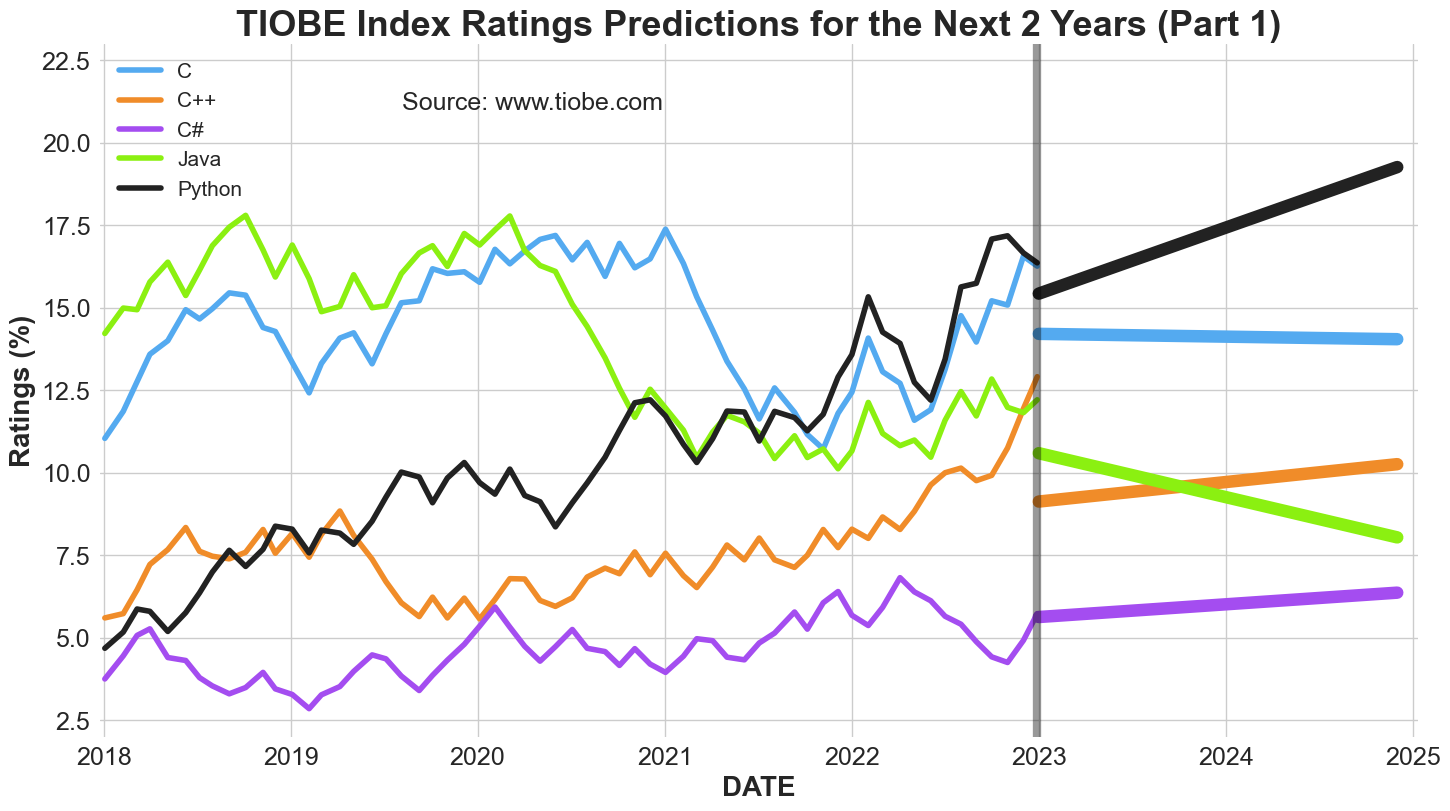

In [322]:
from sklearn.linear_model import LinearRegression
days_train = np.array(days_train).reshape(-1, 1)
days_test = np.array(days_test).reshape(-1, 1)
all_predictions = []
lang_colors = ['#54aaf0', '#f08c29', '#a44df0', '#8bf011', '#222222']
linreg = LinearRegression()
for lang in ['C', 'C++', 'C#', 'Java', 'Python']:
    linreg.fit(days_train, tiobe_post2018[lang].values.reshape(-1, 1))
    all_predictions.append(linreg.predict(days_test))
plt.figure(figsize=(17,9))
plt.axis([pd.Timestamp('2017-12-25'), pd.Timestamp('2025-01-10'), 2.0, 23.0])
plt.plot(tiobe_post2018['C'], label='C', color='#54aaf0', linewidth=4)
plt.plot(tiobe_post2018['C++'], label='C++', color='#f08c29', linewidth=4)
plt.plot(tiobe_post2018['C#'], label='C#', color='#a44df0', linewidth=4)
plt.plot(tiobe_post2018['Java'], label='Java', color='#8bf011', linewidth=4)
plt.plot(tiobe_post2018['Python'], label='Python', color='#222222', linewidth=4)
plt.text(pd.Timestamp('2019-08-06'), 21.0, 'Source: www.tiobe.com', fontsize=18)
for i in range(5):
    plt.plot(next_24months, all_predictions[i], color=lang_colors[i], linewidth=9)
plt.title('TIOBE Index Ratings Predictions for the Next 2 Years (Part 1)', fontsize=26, fontweight='bold')
plt.xlabel('DATE', fontsize=20, fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axvline(tiobe_post2018.index[-1], color='k', linewidth=6, alpha=0.4)
plt.legend(fontsize=15)
plt.grid(color='#cccccc')
plt.show()

_Here, we revealed the popularity of these programming languages for the future!_ From the outcome above, we can imply that the ratings of **C** will _almost stay the same_ in the next 2 years, despite being an old language! And still, it will probably stay strong against all languages, but one! Well, the prediction tells that **Python** will continue to gain popularity, and, even increase the gap against **C**! Don't be surprised if its rating gets near to **20%** beyond 2023!

Other C-family languages, **C++** and **C#** will have slight increases in the upcoming years and stay in the top 5!

On the contrary, **Java** will continue to lose some ratings; the predictions indicate that it will go down below **10%** in 2024. This feels so bad and heartbreaking for the lovers of this language, right?

All right, let's go on predicting the ratings of different programming languages. I've chosen a 2nd group of five others: **JavaScript**, **PHP**, **R**, **Go**, **Ruby**.

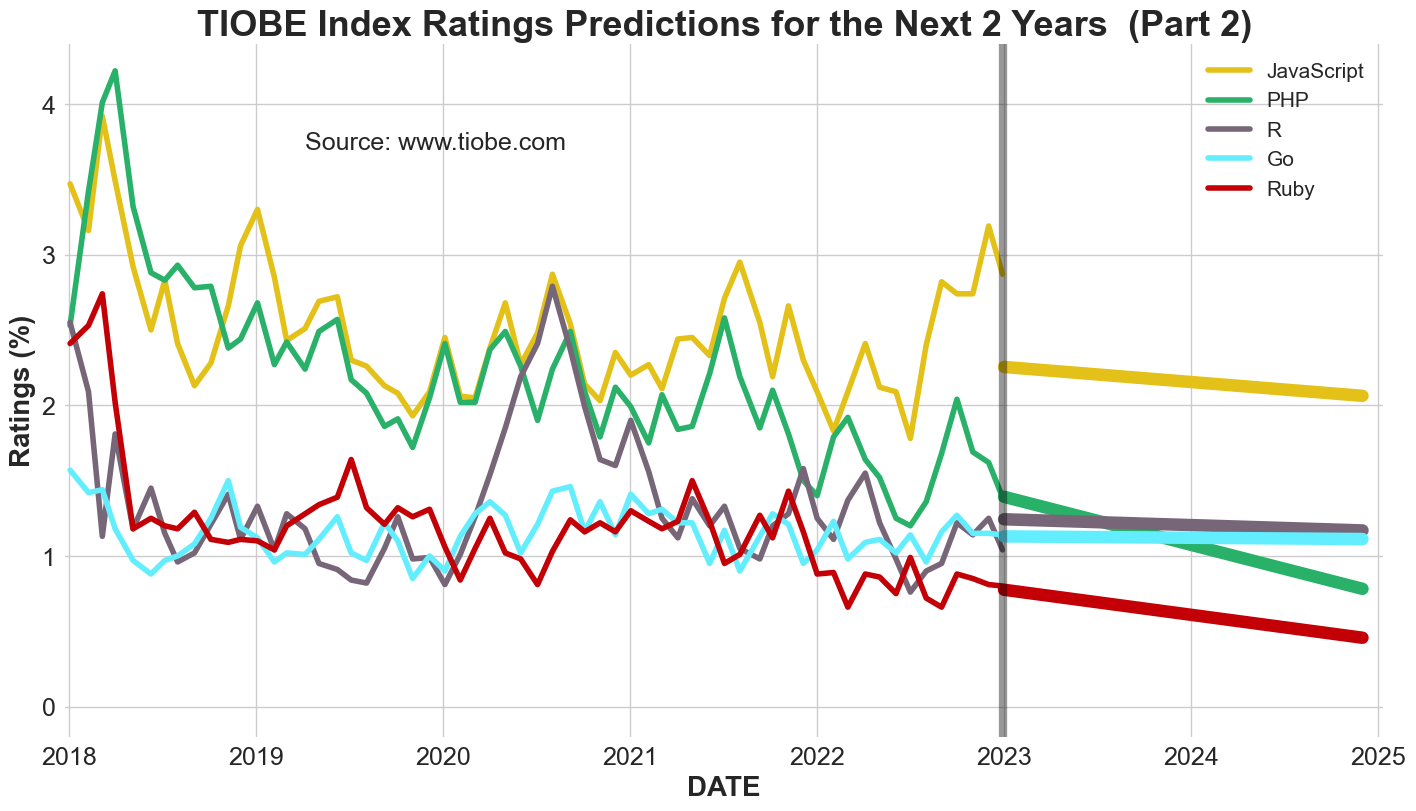

In [323]:
all_predictions = []
lang_colors = ['#e3c119', '#29b069', '#776677', '#63eeff', '#c20006']
for lang in ['JavaScript', 'PHP', 'R', 'Go', 'Ruby']:
    linreg.fit(days_train, tiobe_post2018[lang].values.reshape(-1, 1))
    all_predictions.append(linreg.predict(days_test))
plt.figure(figsize=(17,9))
plt.axis([pd.Timestamp('2017-12-25'), pd.Timestamp('2025-01-10'), -0.2, 4.4])
plt.plot(tiobe_post2018['JavaScript'], label='JavaScript', color='#e3c119', linewidth=4)
plt.plot(tiobe_post2018['PHP'], label='PHP', color='#29b069', linewidth=4)
plt.plot(tiobe_post2018['R'], label='R', color='#776677', linewidth=4)
plt.plot(tiobe_post2018['Go'], label='Go', color='#63eeff', linewidth=4)
plt.plot(tiobe_post2018['Ruby'], label='Ruby', color='#c20006', linewidth=4)
plt.text(pd.Timestamp('2019-04-06'), 3.7, 'Source: www.tiobe.com', fontsize=18)
for i in range(5):
    plt.plot(next_24months, all_predictions[i], color=lang_colors[i], linewidth=9)
plt.title('TIOBE Index Ratings Predictions for the Next 2 Years  (Part 2)', fontsize=26, fontweight='bold')
plt.xlabel('DATE', fontsize=20, fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axvline(tiobe_post2018.index[-1], color='k', linewidth=6, alpha=0.4)
plt.legend(fontsize=15)
plt.grid(color='#cccccc')
plt.show()

From this figure, consequently, all these programming languages will never gain popularity! Among all of them, **PHP** will be affected as the worst due to losing the rating more than the others in the future and it is expected to go under **1%** in 2024. Meanwhile, the negative affect will be minor for **JavaScript** and **Ruby**. Together with these, **R** and **Go** will roughly remain in the same ratings for the days ahead.

**These figures above might be revised at a later time due to these reasons:**

- Addition of _confidence intervals_ could be convenient to display the possible range of rating values can be taken for each programming language involved.
- It is certain that Linear Regression is too simple for prediction; thus, more complex _machine learning regression_ algorithms should be applied for the attempt to make more accurate predictions. (e.g. Polynomial Regression)

### **Well, that's it for the analyses of TIOBE Index Ratings of many programming languages. My plan is to continue these analyses in annually basis.**

# **See you in the next update and thank you very much for reading!**